# CMSC320 Final tutorial

## Members: Inyong Evan Woo, Thomas Outing, Rui Qian

## Introduction

In this tutorial, I would like to introduce basic methods of data analysis, which is one of the most useful analysis tools that can provide a deep understanding about phenomena or problems such as smoking, a serious public health problem in America. This tutorial's purpose is demonstrate how to analyze data with data collection in a data frame, data processing(curation and parsing), exploratory data analysis with data visualization, providing an analysis with hypothesis testing and machine learning. The visualization answers the huge parts of our questions. At the end, the tutorial implies the detailed insights and policy decisions with a message.

I will explain not only a technical guidance of installation and python programming, but also the societal benefits of using data analysis. 

It is a general public consensus that smoking is bad for a person's health. It is linked to cancers or even shorter term effects such as shortness of breath. However, tobacco companies are so powerful and pervasive that they are able to advertise smoking as "cool" or have the money to put into customer acquisition. It becomes the government's responsibility to counter their efforts for the benefit of public health. But are the government's efforts enough? How much can they actually do? Are raising taxes without angering the money from tobacco lobbiests effective?

The purpose for this tutorial is to look into the cost of cigarettes over time and how this will affect smokers. Furthermore, we look into the rising of the taxes and see if it deters the public from smoking. We will look into the war between big tobacco and the government versus public health concerns. 

## Installation and Prerequisites

The below websites will help you to understand this tutorial easily, also teach how to install the frameworks and libraries necessary for this tutorials.

Please visit the below websites to install and walk through them briefly before getting started. 

Python(3) Installation and Tutorials : https://www.python.org/downloads/ 

Pandas Installation and Tutorials : http://pandas.pydata.org/pandas-docs/stable/tutorials.html 

Numpy Installation and Tutorials: https://docs.scipy.org/doc/numpy-1.10.1/user/install.html 

Sklearn Installation and tutorials : http://scikit-learn.org/stable/install.html 

Matplotlib Installation and Tutorials : https://matplotlib.org/api/pyplot_api.html 

<h1>Data Collection and Curation</h1>
<br/><br/>
The first step of entire data analysis process is data collection by curating and extracting data from files.

This section introduces how we can scrap websites and different types of files like csv, json, and etc. 

Please download a csv data file from this website 
(https://www.healthdata.gov/dataset/tax-burden-tobacco-volume-49-1970-2014) and https://catalog.data.gov/dataset/maryland-adult-cigarette-smoking-status-1995-2010-eebdc

Save the csv file and upload it on the same directory with this tutorial file.

It will read it with read_csv in pandas framework. 

It creates data frame from the file. 

A brief look at the file is on the below.
<br/><br/>

In [37]:
%matplotlib inline
import scipy.stats as stats
import pandas as pd
import sklearn.datasets, numpy as np, matplotlib.pyplot as plt, pylab
from ggplot import *
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
from __future__ import print_function

import statsmodels.stats.anova as an

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import f_regression
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

tobacco_data = pd.read_csv("tobacco.csv")
df = pd.DataFrame(tobacco_data)
df.head()

,LocationAbbr,LocationDesc,Year,Datasource,TopicDesc,MeasureDesc,SubMeasureDesc,Data_Value,Data_Value_Unit,Data_Value_Type,GeoLocation,Source,TopicTypeId,TopicId,MeasureId,SubMeasureID,SubMeasureIdDisplayOrder
0,AL,Alabama,1970,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,0.427,$,Dollars,"(32.84057112200048, -86.63186076199969)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1
1,AK,Alaska,1970,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,0.418,$,Dollars,"(64.84507995700051, -147.72205903599973)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1
2,AZ,Arizona,1970,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,0.385,$,Dollars,"(34.865970280000454, -111.76381127699972)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1
3,AR,Arkansas,1970,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,0.388,$,Dollars,"(34.74865012400045, -92.27449074299966)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1
4,CA,California,1970,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,0.397,$,Dollars,"(37.63864012300047, -120.99999953799971)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1


<h1>Data Processing </h1>
<br/><br/>
In order to analyze the data, we will create the separated frames/tables to distinguish the different data. These tables will describe the following: 

1\. create the data frame or table called "simplified" that has every data of LocationDesc, Year, SubMeasureDesc, Data_Value columns.

2\. create the data frame called "average_cost" that has every data of LocationDesc, Year, Data_Value columns while taking "Average Cost per pack" in SubMeasureDesc column. 

3\. create a data frame called "tax_cost" that has every data of LocationDesc, Year, Data_Value columns while taking "Federal and State Tax per pack" in SubMeasureDesc column. 

4\. create the data frame called "cigar_consumption" that has every data of LocationDesc, Year, Data_Value columns while taking "Cigarette Consumption" in SubMeasureDesc column. 

<br/><br/>

In [38]:
simplified = tobacco_data[["LocationDesc", "Year", "SubMeasureDesc", "Data_Value"]]
simplified=simplified.dropna()
simplified
average_cost = simplified[simplified["SubMeasureDesc"].str.contains("Average Cost")]

tax_cost = simplified[simplified["SubMeasureDesc"].str.contains("Federal and State Tax per pack")]

cigar_consumption = simplified[simplified["SubMeasureDesc"].str.contains("Cigarette Consumption")]

print("Average Cost per pack Data Frame")
average_cost.head()


Average Cost per pack Data Frame


,LocationDesc,Year,SubMeasureDesc,Data_Value
0,Alabama,1970,Average Cost per pack,0.427
1,Alaska,1970,Average Cost per pack,0.418
2,Arizona,1970,Average Cost per pack,0.385
3,Arkansas,1970,Average Cost per pack,0.388
4,California,1970,Average Cost per pack,0.397


In [39]:
print("Federal and State Tax per pack Data Frame")
tax_cost.head()

Federal and State Tax per pack Data Frame


,LocationDesc,Year,SubMeasureDesc,Data_Value
7191,Alabama,1970,Federal and State Tax per pack,0.2000
7192,Alaska,1970,Federal and State Tax per pack,0.1600
7193,Arizona,1970,Federal and State Tax per pack,0.1800
7194,Arkansas,1970,Federal and State Tax per pack,0.2075
7195,California,1970,Federal and State Tax per pack,0.1800


In [40]:
print("Cigarette Consumption Data Frame")
cigar_consumption.head()

Cigarette Consumption Data Frame


,LocationDesc,Year,SubMeasureDesc,Data_Value
2397,Alabama,1970,Cigarette Consumption (Pack Sales Per Capita),89.8
2398,Alaska,1970,Cigarette Consumption (Pack Sales Per Capita),121.3
2399,Arizona,1970,Cigarette Consumption (Pack Sales Per Capita),115.2
2400,Arkansas,1970,Cigarette Consumption (Pack Sales Per Capita),100.3
2401,California,1970,Cigarette Consumption (Pack Sales Per Capita),123.0


<h1>Exploratory Data Analysis (Data Visualization) </h1>
<br/><br/>

Data Transformation is the process to convert a type of data to another format (type). 

In order to analyze the data in general perspective, I will create three graphs that have mean of average cigarette cost(every state) each year, average tax cost(every state) each year, average consumption(every state) each year by using "simplified" data frame.

Then, it has the violin plot graph to show how data spreads for each year.

The visualization will show the relationship among mean of cigarette average cost, mean of tax cost, mean of consumption.

<br/><br/>

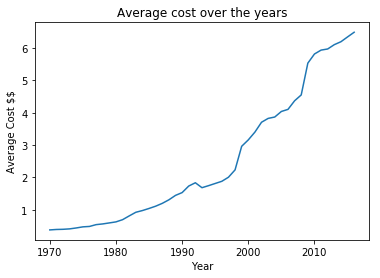

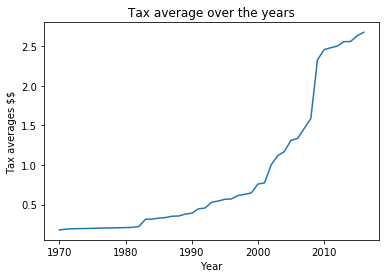

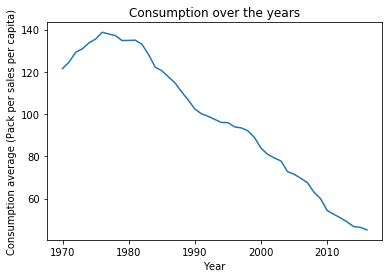

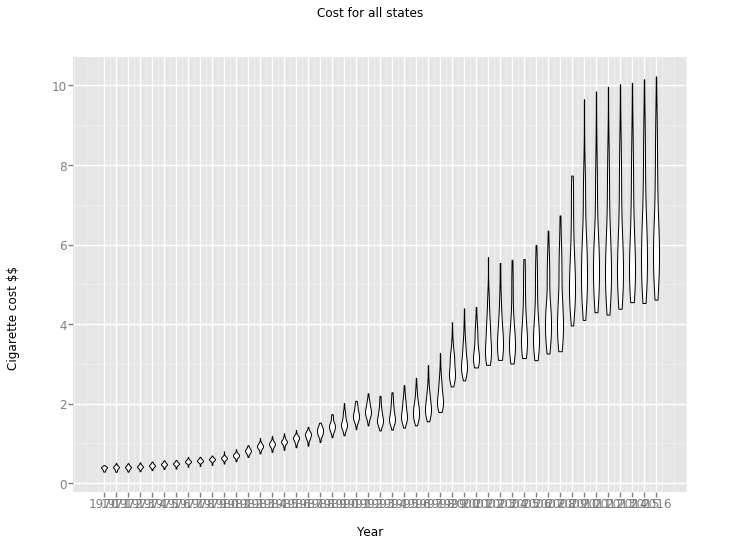

<ggplot: (8785657876488)>

In [41]:
mean_average = average_cost.groupby(['Year']).mean()
mean_year = np.unique(average_cost['Year'])
plt.plot(mean_year, mean_average)
plt.xlabel('Year')
plt.ylabel('Average Cost \$\$')
plt.title("Average cost over the years")
plt.show()

tax_average = tax_cost.groupby(['Year']).mean()
tax_year = np.unique(tax_cost['Year'])
plt.plot(tax_year, tax_average)
plt.xlabel('Year')
plt.ylabel('Tax averages \$\$')
plt.title("Tax average over the years")
plt.show()

consumption_average = cigar_consumption.groupby(['Year']).mean()
consumption_year = np.unique(cigar_consumption['Year'])
plt.plot(consumption_year, consumption_average)
plt.xlabel('Year')
plt.ylabel('Consumption average (Pack per sales per capita)')
plt.title("Consumption over the years")
plt.show()

ggplot(aes(x='Year', y='Data_Value'), data=average_cost) +\
    geom_violin() +\
    labs(title="Cost for all states",
         x = "Year",
         y = "Cigarette cost \$\$")

Now, because we are from the DMV area, I was to look into some specific statistics for states around where I live. I will be producing the same relationships as above, except I am only looking at data from states around Maryland.

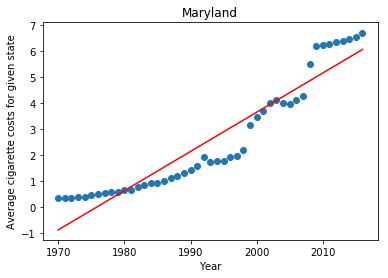

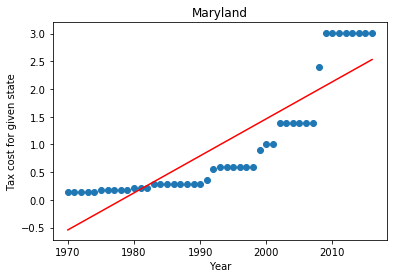

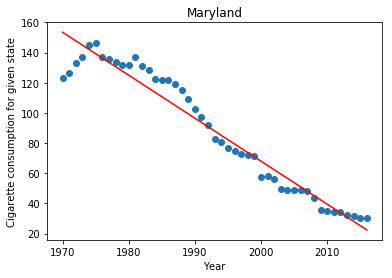

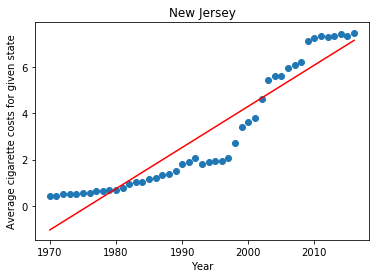

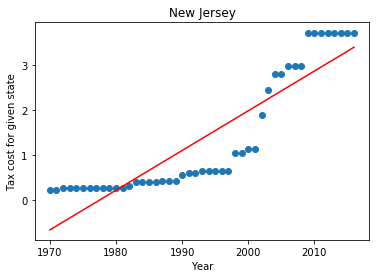

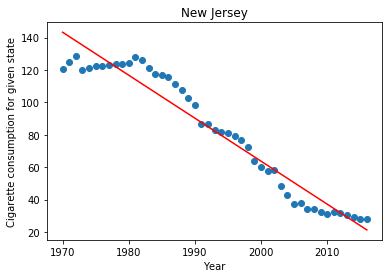

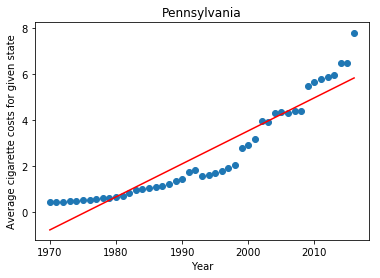

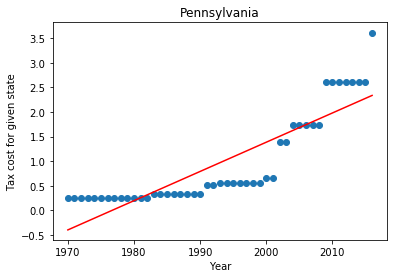

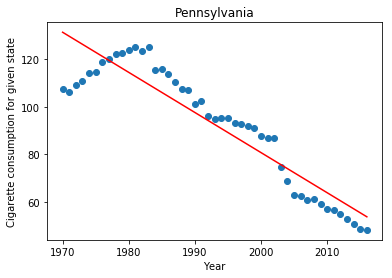

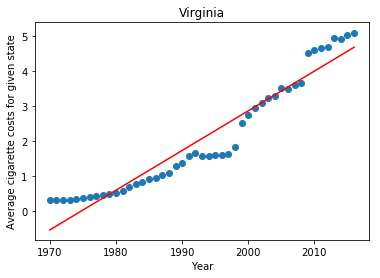

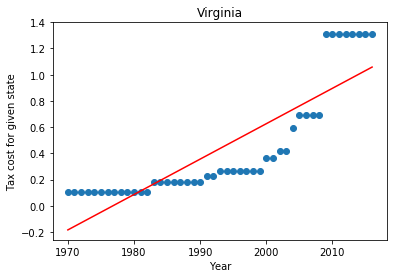

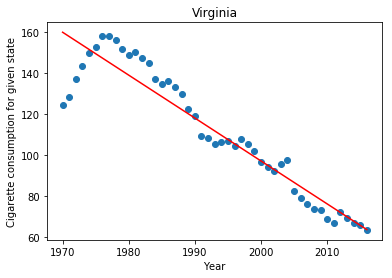

In [42]:
state_arry = np.unique(["Maryland", "Virginia", "Pennsylvania", "New Jersey"])
for i in state_arry:
    cdata = average_cost.set_index('LocationDesc')
    x = cdata.loc[i]['Year']
    y = cdata.loc[i]['Data_Value']
    plt.scatter(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, c='r')
    plt.xlabel('Year')
    plt.ylabel('Average cigarette costs for given state')
    plt.title(i)
    plt.show()
    
    cdata = tax_cost.set_index('LocationDesc')
    x = cdata.loc[i]['Year']
    y = cdata.loc[i]['Data_Value']
    plt.scatter(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, c='r')
    plt.xlabel('Year')
    plt.ylabel('Tax cost for given state')
    plt.title(i)
    plt.show()
    
    cdata = cigar_consumption.set_index('LocationDesc')
    x = cdata.loc[i]['Year']
    y = cdata.loc[i]['Data_Value']
    plt.scatter(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, c='r')
    plt.xlabel('Year')
    plt.ylabel('Cigarette consumption for given state')
    plt.title(i)
    plt.show()


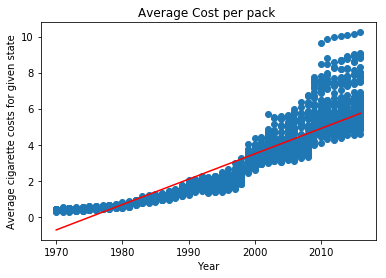

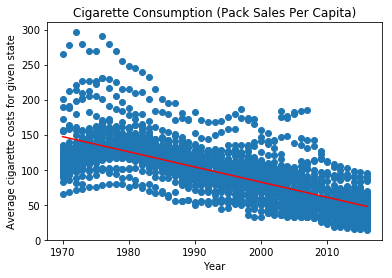

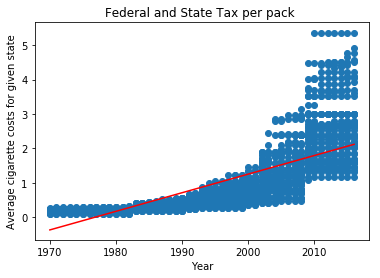

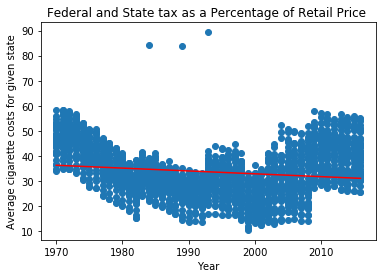

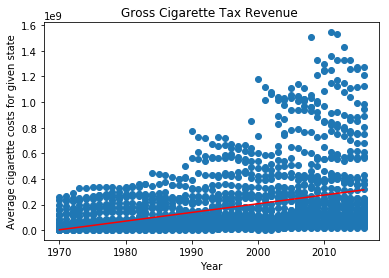

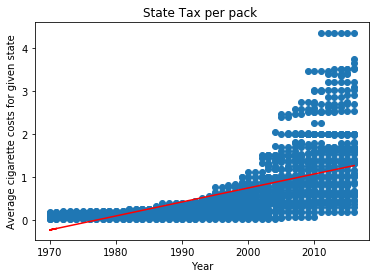

In [43]:
cdata = simplified.set_index('SubMeasureDesc')
SubMeasureDesc = simplified.set_index('SubMeasureDesc')
con_arry = np.unique((simplified.SubMeasureDesc))

for i in con_arry:
    cdata = simplified.set_index('SubMeasureDesc')
    x = cdata.loc[i]['Year']
    y = cdata.loc[i]['Data_Value']
    plt.scatter(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, c='r')
    plt.xlabel('Year')
    plt.ylabel('Average cigarette costs for given state')
    plt.title(i)
    plt.show()
    


This graph accurately depicts the history of cigarette prices and taxes over the years. In particular, on April 1, 2009, the federal cigarette excise tax increased from 39 cents to $1.01 per pack. (The graph shown is state and federal taxes combined). 

Surprisingly, although the tax average spiked dramatically in 2009, the cost of a pack is not as dramatically spiked. I predict that this is because tobacco companies are trying to keep prices lower to not dissuade users from quitting smoking. 

However, smoking is a costly habit to maintain. I predict that as a result of higher prices, there will be a decrease in current smokers (due to quitting and due to fewer people starting to smoke)

In [44]:
smokers = pd.read_csv("smoker.csv")
dfsmoke = pd.DataFrame(smokers)
dfsmoke.head()

,Calendar Year,Current Smoker (Every Day),Current Smoker (Some Days),Current Smoker (Every Day and Some Days Combined),Former Smoker,Never Smoked
0,1995,18.0,3.1,21.1,20.6,58.3
1,1996,17.9,3.0,20.9,23.4,55.7
2,1997,17.6,2.9,20.4,22.8,56.8
3,1998,16.7,5.7,22.4,24.2,53.4
4,1999,15.5,4.8,20.3,24.2,55.5


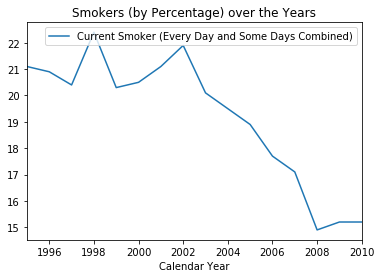

In [45]:
dfsmoke.plot(x="Calendar Year", y="Current Smoker (Every Day and Some Days Combined)", kind='line', title= "Smokers (by Percentage) over the Years") 

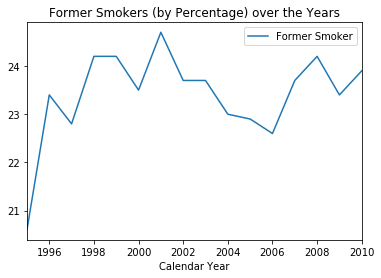

In [46]:
dfsmoke.plot(x="Calendar Year", y="Former Smoker", kind='line', title= "Former Smokers (by Percentage) over the Years") 

Surprisingly, a surge in pricing of cigarettes does not seem to decrease the percentage of smokers or increase the percent of former smokers. There doesn't seem to be a strong positive correlation between price of cigarettes and people quitting smoking. However, there is a stronger negative correlation between the price of cigarettes and the percent of people who smoke. This implies that there are fewer people who are starting to smoke than before. We can predict that cost is a factor into fewer Americans smoking, but also other factors such as education and public health campaigns about the dangers of smoking are also factors

It is interesting because in 2002, there appears to be a decline in percent of smokers. Within the same year, legislature passed prohibiting smoking in public places. 

Here is some links to readings and data that supports this argument

https://www.hindawi.com/journals/jeph/2012/314740/

https://en.wikipedia.org/wiki/Tobacco_control

https://4d127daa-a-62cb3a1a-s-sites.googlegroups.com/site/weitaneconomics/home/research/LiuTan2009.pdf?attachauth=ANoY7cq0zaDenJbuFmudCqVBt0GLJsIw-vG4AwW20NoNPmIlDo15e3oqOUgFwn9Kw-QhFVn2EF8zYHKxUgOKJg3g1j0IJt8TofpZqOwSmB3dylY-pnO18syTM5t7PGW1USq1bPzG0kk9U4rkIDVA4HmUVC71EQzot6EFRpO5x6Hcenmfy56Yfn0XHRLfoQYpwvMrO7BbTo6KC_d60tIzsqfVtfrTsXYmzq2roN_yL2-F-exq4y_xSZk%3D&attredirects=0

https://www.healthdata.gov/dataset/tax-burden-tobacco-volume-51-1970-2016-0

Now, I am combining some data from our first data set to our second dataset to graph the price versus smoking percentage per year. 

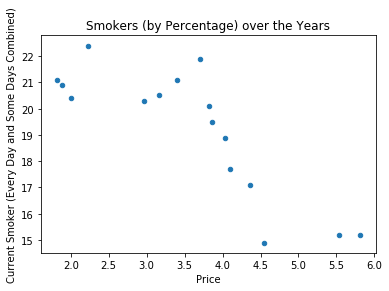

In [47]:
mean_average2 = average_cost.groupby(['Year']).mean()[25:41]
mean_year2 = np.unique(average_cost['Year'])[25:41]
dfsmoke['Price'] = mean_average2['Data_Value'].tolist()
dfsmoke.plot(x="Price", y="Current Smoker (Every Day and Some Days Combined)", kind='scatter', title= "Smokers (by Percentage) over the Years") 


<h1>Hypothesis Test & Machine Learning </h1>
<br/><br/>

In this tutorial, I will be conducting a hypothesis test on the correlation between the price of a pack of cigarettes and the probability that a given person is a smoker. I hypothesize that the increase in price will decrease the likeliness of someone being a smoker.

I will also create the standard deviation column, average column, and the other columns for our data, for further analysis 

A great material for machine learning is found https://beckernick.github.io/logistic-regression-from-scratch/
<br/><br/>

In [48]:
import scipy.stats as stats
stats.pearsonr(dfsmoke['Price'], dfsmoke['Current Smoker (Every Day and Some Days Combined)'])


(-0.82972610961779247, 7.0037218723177435e-05)

According to https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.pearsonr.html, the result should be 2 values. The first is the person's correlation coefficient or the "R" value. Our value of ~-.83 indicates that there is a fairly strong negative correlation between the price of a pack of cigarettes and the likeliness that someone is a smoker. This means that as the price goes up, the likeliness goes down.

The second value is the 2-tailed p-value. This value is .00007 which is close to 0. This means that we can reject our null hypothesis with at least 99% confidence

In [49]:
df = pd.DataFrame(simplified)

regression = smf.ols(formula='Data_Value ~ Year * SubMeasureDesc', data=df).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     867.5
Date:                Sat, 16 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:07:35   Log-Likelihood:            -2.8320e+05
No. Observations:               14382   AIC:                         5.664e+05
Df Residuals:                   14370   BIC:                         5.665e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      -277.9051   2.59e+08  -1.07e-06      1.000   -5.07e+08    5.07e+08
SubMeasureDesc[T.Cigarette Consumption (Pack Sales Per Capita)]                4689.1715   3.66e+08   1.28e-05      1.000   -7.17e+08    7.17e+08
SubMeasureDesc[T.Federal and State Tax per pack ]                               171.1848   3.66e+08   4.68e-07      1.000   -7.17e+08    7.17e+08
SubMeasureDesc[T.Federal and State tax as a Percentage of Retail Price ]        537.6871   3.66e+08   1.47e-06      1.000   -7.17e+08    7.17e+08
SubMeasureDesc[T.Gross Cigarette Tax Revenue ]                                -1.333e+10   3.66e+08    -36.411      0.000    -1.4e+10   -1.26e+10
SubMeasureDesc[T.State Tax per pack ]                                           213.4292   3.66e+08   5.83e-07      1.000   -7.17e+08    7.17e+08
Year                                                                              0.1407    1.3e+05   1.08e-06      1.000   -2.55e+05    2.55e+05
Year:SubMeasureDesc[T.Cigarette Consumption (Pack Sales Per Capita)]             -2.3052   1.84e+05  -1.26e-05      1.000    -3.6e+05     3.6e+05
Year:SubMeasureDesc[T.Federal and State Tax per pack ]                           -0.0867   1.84e+05  -4.72e-07      1.000    -3.6e+05     3.6e+05
Year:SubMeasureDesc[T.Federal and State tax as a Percentage of Retail Price ]    -0.2542   1.84e+05  -1.38e-06      1.000    -3.6e+05     3.6e+05
Year:SubMeasureDesc[T.Gross Cigarette Tax Revenue ]                            6.767e+06   1.84e+05     36.848      0.000    6.41e+06    7.13e+06
Year:SubMeasureDesc[T.State Tax per pack ]                                       -0.1081   1.84e+05  -5.89e-07      1.000    -3.6e+05     3.6e+05
==============================================================================
Omnibus:                    16322.835   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2114351.327
Skew:                           5.822   Prob(JB):                         0.00
Kurtosis:                      61.247   Cond. No.                     2.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
an.anova_lm(regression, typ=2)

,sum_sq,df,F,PR(>F)
SubMeasureDesc,5.077627e+19,5.0,1365.493373,0.000000e+00
Year,3.365908e+18,1.0,452.586008,6.575839e-99
Year:SubMeasureDesc,1.682955e+19,5.0,452.586337,0.000000e+00
Residual,1.068705e+20,14370.0,NaN,NaN


In [51]:
regression2 = smf.ols(formula='Data_Value ~ Year', data=df).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     867.5
Date:                Sat, 16 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:07:35   Log-Likelihood:            -2.8320e+05
No. Observations:               14382   AIC:                         5.664e+05
Df Residuals:                   14370   BIC:                         5.665e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      -277.9051   2.59e+08  -1.07e-06      1.000   -5.07e+08    5.07e+08
SubMeasureDesc[T.Cigarette Consumption (Pack Sales Per Capita)]                4689.1715   3.66e+08   1.28e-05      1.000   -7.17e+08    7.17e+08
SubMeasureDesc[T.Federal and State Tax per pack ]                               171.1848   3.66e+08   4.68e-07      1.000   -7.17e+08    7.17e+08
SubMeasureDesc[T.Federal and State tax as a Percentage of Retail Price ]        537.6871   3.66e+08   1.47e-06      1.000   -7.17e+08    7.17e+08
SubMeasureDesc[T.Gross Cigarette Tax Revenue ]                                -1.333e+10   3.66e+08    -36.411      0.000    -1.4e+10   -1.26e+10
SubMeasureDesc[T.State Tax per pack ]                                           213.4292   3.66e+08   5.83e-07      1.000   -7.17e+08    7.17e+08
Year                                                                              0.1407    1.3e+05   1.08e-06      1.000   -2.55e+05    2.55e+05
Year:SubMeasureDesc[T.Cigarette Consumption (Pack Sales Per Capita)]             -2.3052   1.84e+05  -1.26e-05      1.000    -3.6e+05     3.6e+05
Year:SubMeasureDesc[T.Federal and State Tax per pack ]                           -0.0867   1.84e+05  -4.72e-07      1.000    -3.6e+05     3.6e+05
Year:SubMeasureDesc[T.Federal and State tax as a Percentage of Retail Price ]    -0.2542   1.84e+05  -1.38e-06      1.000    -3.6e+05     3.6e+05
Year:SubMeasureDesc[T.Gross Cigarette Tax Revenue ]                            6.767e+06   1.84e+05     36.848      0.000    6.41e+06    7.13e+06
Year:SubMeasureDesc[T.State Tax per pack ]                                       -0.1081   1.84e+05  -5.89e-07      1.000    -3.6e+05     3.6e+05
==============================================================================
Omnibus:                    16322.835   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2114351.327
Skew:                           5.822   Prob(JB):                         0.00
Kurtosis:                      61.247   Cond. No.                     2.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
an.anova_lm(regression2, typ=2)

,sum_sq,df,F,PR(>F)
Year,3.365908e+18,1.0,277.411604,1.041091e-61
Residual,1.744763e+20,14380.0,NaN,NaN


## Machine Learning

In [53]:
# logistic regression update equation

# this code and derivation is from
# https://beckernick.github.io/logistic-regression-from-scratch/
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        #log likelihood or sum over all training data
        #sum from 1 to N [y_i*beta^T*x_i - log(1+e^(beta^Tx_i))]
        #where y is the target class (0 or 1), x_i is the individual datapoint, 
        #beta is the weights vector
        scores = np.dot(features, weights)  
        predictions = sigmoid(scores)       
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
    return weights

In [54]:
#simulate data for linear regression

gen_data_x, gen_data_y, lin_gen_data_coef = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef=True)
#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y, log_gen_data_coef = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef=True)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

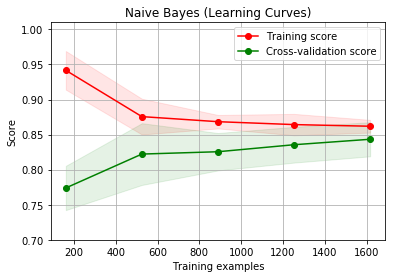

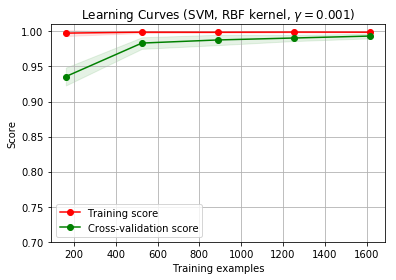

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Naive Bayes (Learning Curves)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

<h1>Conculsion:</h1>

We can all probably agree that smoking is bad for you. However, for some reason, there are many people that still do it. Smoking doesn't only affect the health of the smoker, but also everyone around them (second-hand smoke anyone?). It is up to the government to dissuade its citizens from smoking.


We can conclude that there is a strong correlation between the price of a pack of cigarettes and the percent of people who smoke. This is a good sign for the government because it indicates that their efforts in raising taxes to dissuade people from smoking is working. However, this would be an interesting path to research further upon for the Tobacco companies to maximize their profits by controlling the prices of the packs (and controlling their profit margins). Based on our preliminary line graphs, if we were to do this research we would hypothesize that there is a negative correlation between Federal and State tax and Cigarette Consumption.
    

<h1>Further Resouces</h1>

Data science is a growing and important field of study. Taking care of our bodies are also important. Here are some links to further resources on Python + libraries, Data Science and resources on data related to drugs and health. Some have been linked throughout this tutorial and some have additional sources.
https://www.coursera.org/courses?languages=en&query=python
https://www.coursera.org/courses?_facet_changed_=true&domains=data-science&languages=en&query=python
http://scikit-learn.org/stable/install.html
https://www.youtube.com/watch?v=Iqjy9UqKKuo
https://www.healthdata.gov/
https://catalog.data.gov/dataset/maryland-adult-cigarette-smoking-status-1995-2010-eebdc
https://beckernick.github.io/logistic-regression-from-scratch/

Also here is a link to a class at UMD you might be interested in taking.
https://github.com/umddb/cmsc320-fall2017
